<a href="https://colab.research.google.com/github/BraiLoza/Proyecto_Github/blob/main/Titanic_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                           **Titanic**

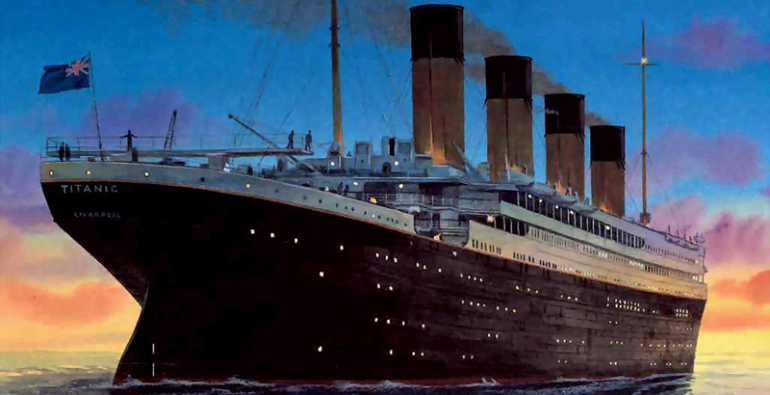

**Analizaremos el famoso caso de Titanic!**


1.   Exploraremos los datos de los que subieron
2.   Analizaremos datos y haremos la limpieza del dataset
3.   Separaremos en Genero, clase y sobrevivientes.
4.   Podremos saber que grupo tenia mas chances de sobrevivir



In [40]:
from google.colab import drive
drive.mount ("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **1- Importamos las librerias que vamos a utilizar**

Estas son las librerias que vamos a utilizar para la manipulacion, visualizacion, modelado y aprendizaje automatico que haremos


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Importamos el dataset


# ***2- Analisis exploratorio de los datos***

In [42]:
df = pd.read_csv("/content/gdrive/MyDrive/Titanic-Dataset.csv", index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Estos datos estan representados por :**

Survival: Sobreviviente (0 = No, 1 = Sí)
Pclass: Clase del boleto (1 = 1ra, 2 = 2da, 3 = 3ra)
Sex: Sexo
Age: Edad en años
SibSp: Número de hermanos/cónyuges a bordo del Titanic
Parch: Número de padres/hijos a bordo del Titanic
Ticket: Número de boleto
Fare: Tarifa del pasajero
Cabin: Número de cabina
Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [43]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [46]:
df.drop("Cabin", axis=1, inplace=True)

Decido eliminar el numero de la cabina porque no creo que me pueda dar mucha informacion y tiene muchos valores nulos los cuales entorpecen el analisis

In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


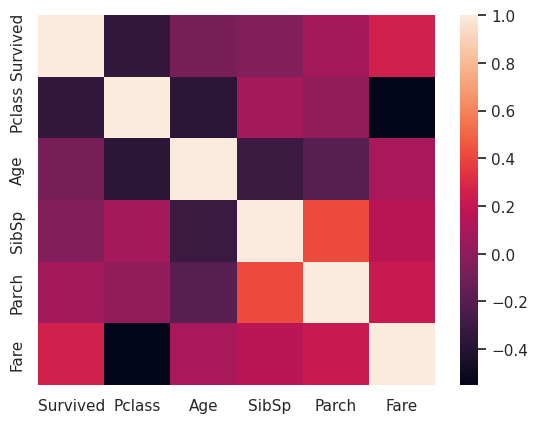

In [49]:
sns.heatmap(df.corr())
plt.show()

El mapa de calor proporciona una representación visual de la matriz de correlación. Utiliza una escala de colores, donde los colores más oscuros representan correlaciones negativas, los colores más claros representan correlaciones positivas y los colores intermedios representan una correlación cercana a cero. Esto permite identificar rápidamente las relaciones más fuertes y más débiles entre las variables.

Es decir, el cuadro generado muestra la matriz de correlación del conjunto de datos del Titanic, proporcionando información sobre cómo las diferentes variables numéricas están relacionadas entre sí. Ayuda a identificar patrones y tendencias en los datos y puede ser útil para tomar decisiones o realizar análisis más profundos.

Media de Pclass: 2
Media de Age: 29


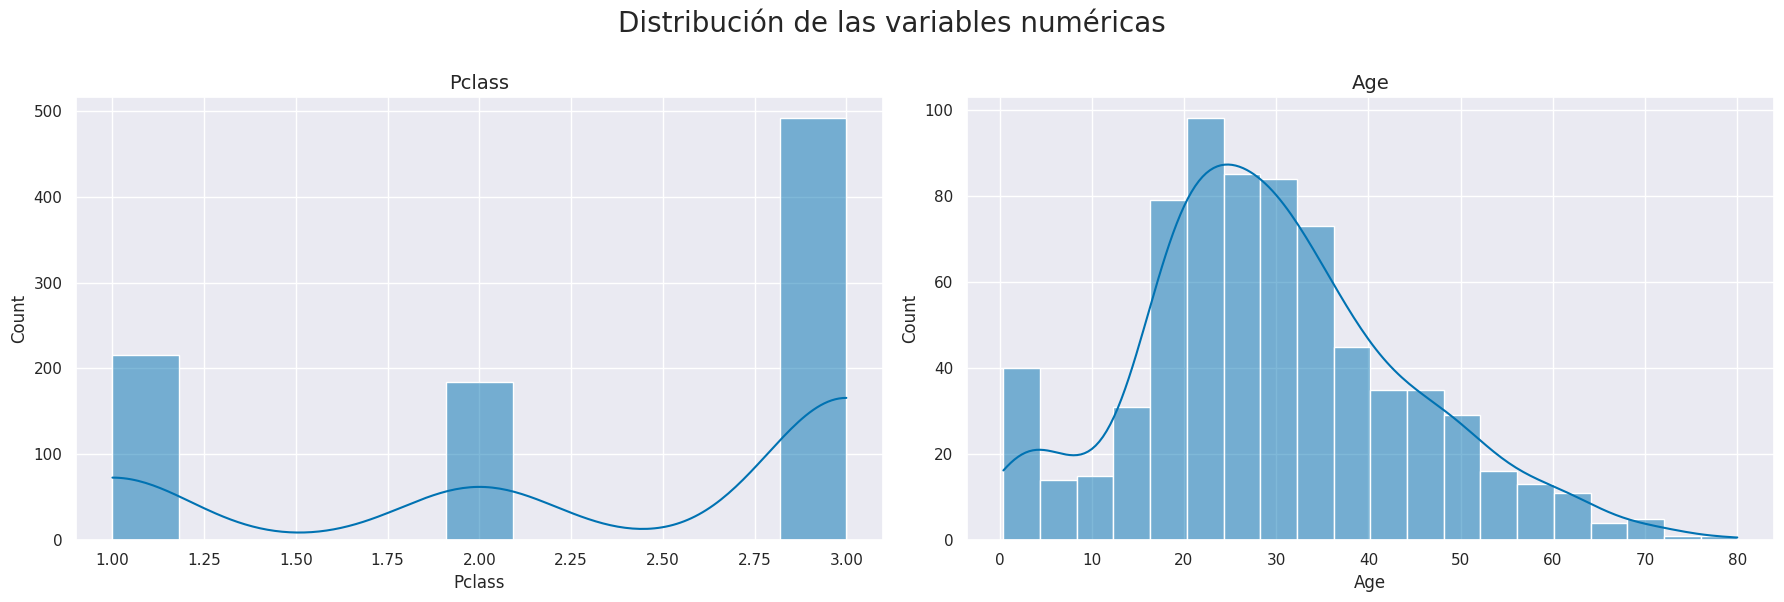

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = [ 'Pclass', 'Age']

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axs[i], kde=True, color='#0072B2')
    axs[i].set_title(col, fontsize=14)
    print(f'Media de {col}: {int(df[col].mean())}')


plt.tight_layout()
plt.show()


El cuadro de la izquierda muestra que la 3era clase fue la que predomino en el barco por otro lado en el cuadro de la derecha vemos que la media de edad de los pasajeros es de 30 años

Para el siguiente paso vamos a usar las variables que consideramos numericas de las que son categoricas.

In [51]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


En este punto podemos ver:


1.   La media de **edad** es la misma, tanto si sobrevivieron o no
2.   En Precio del ticket(Fare), vemos que los que pagaron mas son tienen un porcentaje mayor de sobrevivir
3.   Parch: Número de padres/hijos a bordo del Titanic, vemos que la relacion tambien es mas alta en los que sobrevivieron, esto lo podemos atribuir a que los niños fueron una prioridad en rescatar
4.   SibSp: Número de hermanos/cónyuges a bordo del Titanic: Al igual que en el caso anterior, puedo suponer que las mujeres fueron una prioridad y por incrementan el valor de sobrevivientes.



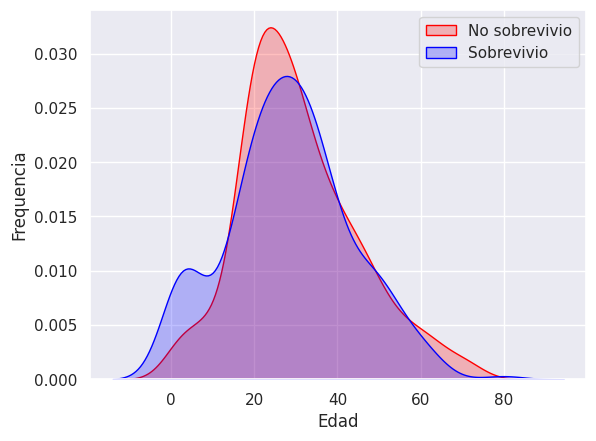

In [52]:
# Gráfico de densidad para las edades de los no sobrevivientes
df1 = df[(df["Survived"] == 0) & (df["Age"].notnull())]
sns.kdeplot(df1["Age"], color="Red", shade=True)

# Gráfico de densidad para las edades de los sobrevivientes
df2 = df[(df["Survived"] == 1) & (df["Age"].notnull())]
sns.kdeplot(df2["Age"], color="Blue", shade=True)

# Personalizar el gráfico
plt.xlabel("Edad")
plt.ylabel("Frequencia")
plt.legend(["No sobrevivio", "Sobrevivio"])

# Mostrar el gráfico
plt.show()

In [53]:
total_pasajeros = len(df)
print("Número total de pasajeros:", total_pasajeros)

sobrevivientes_count = df['Survived'].sum()
print("Número de sobrevivientes:", sobrevivientes_count)

total_pasajeros = len(df)
porcentaje_de_sobrevivientes = (sobrevivientes_count/ total_pasajeros) * 100
print("Porcentaje de sobrevivientes:", porcentaje_de_sobrevivientes)

Número total de pasajeros: 891
Número de sobrevivientes: 342
Porcentaje de sobrevivientes: 38.38383838383838


# *Hasta este momento solo hicimos un estudio general. A partir de aca vamos a profundizar aun mas*

In [54]:
clases_pasajeros = df['Pclass'].value_counts()
print("Recuento de pasajeros por clase:")
print(clases_pasajeros)


Recuento de pasajeros por clase:
3    491
1    216
2    184
Name: Pclass, dtype: int64


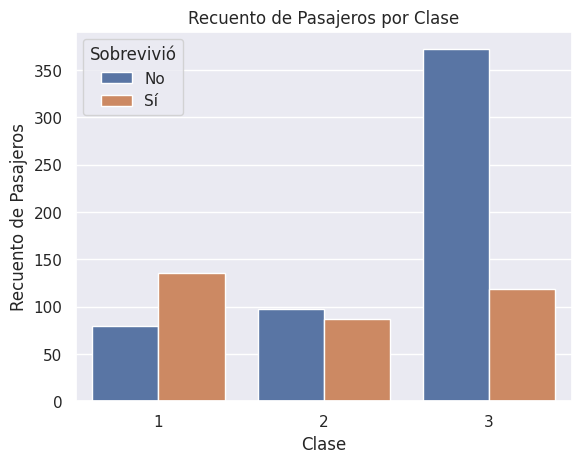

In [55]:
sns.countplot(data=df, x='Pclass', hue='Survived')

plt.xlabel('Clase')
plt.ylabel('Recuento de Pasajeros')
plt.title('Recuento de Pasajeros por Clase')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])


*Podemos ver que si bien era un barco de lujo, la tercera clase doblaba a la primera, pero esto tambien se debe a que muchos de los que trabajan arriba del barco tambien eran considerados de Tercera clase.*

In [56]:
passenger_count = df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')
passenger_count['Pclass'] = passenger_count['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
passenger_count['Survived'] = passenger_count['Survived'].map({0: 'No', 1: 'Yes'})

passenger_count_pivot = passenger_count.pivot_table(index=['Pclass', 'Sex'], columns='Survived', values='Count', fill_value=0)
passenger_count_pivot.columns.name = None
passenger_count_pivot.reset_index(inplace=True)

print(passenger_count_pivot)

  Pclass     Sex   No  Yes
0    1st  female    3   91
1    1st    male   77   45
2    2nd  female    6   70
3    2nd    male   91   17
4    3rd  female   72   72
5    3rd    male  300   47


In [57]:
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


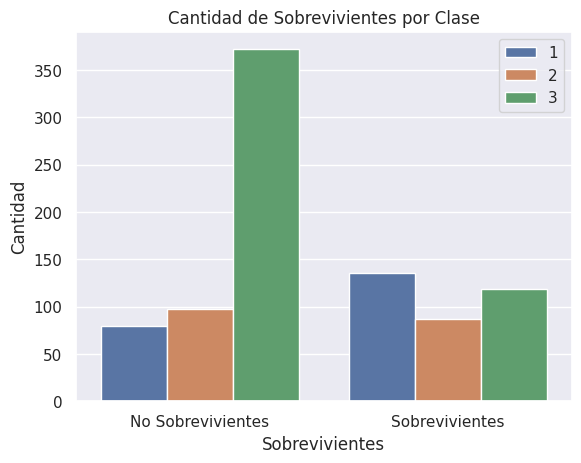

In [58]:
sns.set(style="darkgrid")

# Mapear las etiquetas de las columnas a los valores deseados
labels = {0: 'No Sobrevivientes', 1: 'Sobrevivientes'}
class_labels = {1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'}

# Crear el gráfico de conteo con las etiquetas personalizadas
ax = sns.countplot(x='Survived', hue='Pclass', data=df)

# Modificar las etiquetas del eje x
ax.set_xticklabels([labels[int(x.get_text())] for x in ax.get_xticklabels()])

# Obtener los objetos de leyenda y modificar las etiquetas
legend = plt.legend()
for text in legend.get_texts():
    if text.get_text() in labels:
        text.set_text(labels[int(text.get_text())])
    elif text.get_text() in class_labels:
        text.set_text(class_labels[int(text.get_text())])

# Mostrar el gráfico
plt.xlabel('Sobrevivientes')
plt.ylabel('Cantidad')
plt.title('Cantidad de Sobrevivientes por Clase')
plt.show()


En este caso dividimos por clases y sobrevivientes/no sobrevivientes. Podemos afirmar lo que venimos demostrando bajo los otros estudios:


---


*   La parte mas afectada fue la tercer clase, que te tasa de mortalidad fue muy alta.

*   podemos decir que las mujeres y niños fueron prioridad en los rescatados.





# ***3- Ingenieria de atributos***

In [59]:
y = df[['Age']].values
X = df[['Survived','Pclass','Sex','Embarked']].values

In [60]:
df.dropna(subset=['Age', 'SibSp', 'Parch', 'Fare'], inplace=True)

In [61]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [62]:
df_encoded = pd.get_dummies(df, columns=['Sex'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Ticket    714 non-null    object 
 8   Fare      714 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.4+ KB


In [64]:
df[['Age', 'Fare']] = df[['Age', 'Fare']].astype(int)


In [65]:
df_num = df[[ 'Pclass','Age', 'Survived',"SibSp","Parch","Fare" ]].values
df_cat = df[['Name', "Sex", "Ticket", "Embarked"]]

for var in df_cat:
    lista_cat = f'var_{var}'
    lista_cat = pd.get_dummies(df[var], prefix=var)
    df = df.join(lista_cat)

df.drop(columns= df_cat, inplace = True)



In [66]:
scaler = MinMaxScaler()
df_num = scaler.fit_transform(df_num)

# **4- Entrenamiento de datos**

In [67]:
X = df.drop(['Age','Pclass'], axis=1)
y = df['Survived']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 1.0


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión del modelo de árbol de decisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0


Árbol de Decisión:

Mejores parámetros: Muestra los valores óptimos de los hiperparámetros encontrados para el Árbol de Decisión.
Precisión del entrenamiento: Indica la precisión del modelo en el conjunto de entrenamiento.
Precisión del test: Indica la precisión del modelo en el conjunto de prueba.

In [70]:
# Modelo
lr = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

# Entrenamiento
lr.fit(X_train, y_train)

# Predicción
y_pred = lr.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo de árbol de decisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0


Regresión Logística:

Mejores parámetros: Muestra los valores óptimos de los hiperparámetros encontrados para la Regresión Logística.
Precisión del entrenamiento: Indica la precisión del modelo en el conjunto de entrenamiento.
Precisión del test: Indica la precisión del modelo en el conjunto de prueba.

In [72]:
# Modelo
svc = SVC()

# Entrenamiento
svc.fit(X_train, y_train)

# Predicción
y_pred = svc.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo de árbol de decisión: 0.6643356643356644
Precisión: 0.6818181818181818
Recall: 0.26785714285714285
F1-score: 0.3846153846153846


SVM (Máquinas de Vectores de Soporte):

Mejores parámetros: Muestra los valores óptimos de los hiperparámetros encontrados para SVM.
Precisión del entrenamiento: Indica la precisión del modelo en el conjunto de entrenamiento.
Precisión del test: Indica la precisión del modelo en el conjunto de prueba.

In [73]:
# Modelo
nn = MLPClassifier(max_iter = 500)

# Entrenamiento
nn.fit(X_train, y_train)

# Predicción
y_pred = nn.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo de árbol de decisión: 0.986013986013986
Precisión: 1.0
Recall: 0.9642857142857143
F1-score: 0.9818181818181818


Red Neuronal:

Mejores parámetros: Muestra los valores óptimos de los hiperparámetros encontrados para la Red Neuronal.
Precisión del entrenamiento: Indica la precisión del modelo en el conjunto de entrenamiento.
Precisión del test: Indica la precisión del modelo en el conjunto de prueba

In [74]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Logistica', LogisticRegressionCV(max_iter=1000)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Red Neuronal', MLPClassifier(max_iter=10000))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Logistica: 1.0 (0.0)
Arbol de Decision: 1.0 (0.0)
SVM: 0.67596 (0.02282)
Red Neuronal: 0.98947 (0.00656)


   *En general, estos resultados te brindan información sobre la eficacia de los modelos aplicados a tus datos. La precisión indica qué tan bien se ajusta el modelo a los datos y los hiperparámetros óptimos encontrados ayudan a configurar el modelo de manera más efectiva.*

# **5- Optimización y selección de modelo**

In [37]:
# Hiperparámetros
params = [{'Regresion Logistica__Cs': [1, 10],
           'Regresion Logistica__penalty': ['l1', 'l2'],
           'Regresion Logistica__solver': ['liblinear']},

          {'Arbol de Decision__max_depth': [2, 4, 6],
           'Arbol de Decision__min_samples_split': [2, 4, 6]},

          {'SVM__C': [0.1, 1, 10],
           'SVM__kernel': ['linear', 'rbf']},

          {'Red Neuronal__hidden_layer_sizes': [(10,), (50,), (100,)],
           'Red Neuronal__activation': ['relu', 'logistic'],
           'Red Neuronal__alpha': [0.0001, 0.01, 0.1]}]


result = []
best_models = []
# Búsqueda de hiperparámetros para cada modelo
for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Logistica:
Mejores parametros: {'Regresion Logistica__Cs': 10, 'Regresion Logistica__penalty': 'l1', 'Regresion Logistica__solver': 'liblinear'}
Precisión del entrenamiento: 1.0
Precisión del test: 1.0
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 2, 'Arbol de Decision__min_samples_split': 2}
Precisión del entrenamiento: 1.0
Precisión del test: 1.0
--------------------------------------------
SVM:
Mejores parametros: {'SVM__C': 0.1, 'SVM__kernel': 'linear'}
Precisión del entrenamiento: 1.0
Precisión del test: 1.0
--------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(models):
    y_pred = best_models[i][1].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Gráficas
    df_temp = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    colors = sns.color_palette('pastel')
    sns.lineplot(x='fpr', y='tpr', data=df_temp, color=colors[0], lw=2, label='ROC curve (area = %0.2f)' % roc_auc, ax=axs[i])
    axs[i].plot([0, 1], [0, 1], color=colors[2], lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('Tasa de falsos positivos')
    axs[i].set_ylabel('Tasa de verdaderos positivos')
    axs[i].set_title('Curva ROC (' + name + ')')
    axs[i].legend(loc="lower right")

plt.tight_layout()
plt.show()

***la curva ROC es una herramienta útil para evaluar y comparar modelos de clasificación, brindando información sobre su capacidad de distinguir entre clases positivas y negativas en diferentes umbrales de clasificación.***

# **6 - Conclusion**

Finalizando el largo estudio que hicimos sobre el Barco mas famoso, podemos hacer una conclusión sobre el caso.


1.   Si eras mujer de clase alta o un niño, tienes muchas mas chances de salir ilesa.
2.   Si eras mujer clase media/baja u hombre clase alta te digo que sigues teniendo mas chances de poder salir en un barco de rescate.
3.   Mientras que si eras hombre clase media, tus chances eran mucho mas escasas que que las 2 anteriores
4.   Por ultimo y casi sin chances de poder vivir quedan los hombres de clase baja



Es evidente que si hablamos del titanic pensamos directamente en la pelicula producida por James Cameron y protagonizada por y protagonizada por Leonardo DiCaprio (Jack), Kate Winslet(Rose). Bien lo que queria reflejar en este estudio era que tan acertado era lo que paso en la pelicula... y para darle una conclusión es importante reflejar los valores de supervivencia que ellos demostraron mujeres 74% y hombres 18%.




                                      Gracias por su atención!

                                              Fin

---



pd: Si te intereso el caso o hay cosas que no quedaron del todo claro, no dudes en consultarme.